In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
train_df = pd.read_csv('house_prices_dataset.csv')

In [9]:
X_train, X_test, y_train, y_text = train_test_split(train_df['area'], train_df['price'])

In [5]:
train_df

,area,price
0,2231.88,558852.17
1,2524.92,632260.29
2,1527.65,382994.25
3,1986.09,497607.86
4,2920.16,730870.84
...,...,...
95,2345.42,587342.25
96,1701.95,426321.81
97,2880.39,721159.46
98,2273.60,569238.36


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    100 non-null    float64
 1   price   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [4]:
train_df.describe()

,area,price
count,100.00000,100.000000
mean,2247.97960,562990.340700
std,453.86445,113464.467239
min,1522.16000,381657.070000
25%,1812.84750,454164.525000
50%,2284.15000,571887.305000
75%,2617.72750,655407.227500
max,2995.40000,749686.490000


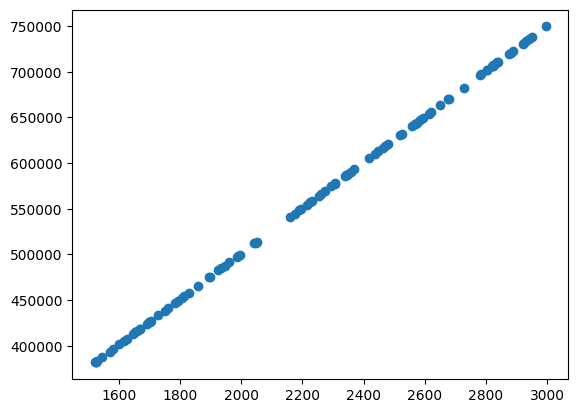

In [11]:
plt.scatter(train_df['area'], train_df['price'])

In [12]:
def predict(x, w, b):
    return w * x + b

In [33]:
def compute_cost(x, y, w, b):
    m = len(x)

    total_cost = 0
    for i in range(m):
        prediction = predict(x[i], w, b)
        error = prediction - y[i]

        total_cost += error**2

    return total_cost / (2*m)

In [34]:
compute_cost(train_df['area'], train_df['price'], 400, -1000000000)

np.float64(4.996638573107908e+17)

In [35]:
def compute_gradient(x, y, w, b):
    m = len(x)

    dw = 0
    db = 0
    for i in range(m):
        prediction = predict(x[i], w, b)

        dw += (prediction - y[i]) * x[i]
        db += (prediction - y[i])

    dw = dw / m
    db = db / m
    
    return dw, db 

In [69]:
def gradient_descent(x, y, w_init, b_init, alpha, iteration):
    w = w_init
    b = b_init

    J_hist = []

    for i in range(iteration):
        dw, db = compute_gradient(x, y, w, b)  
        w = w - alpha * dw
        b = b - alpha * db

        corr_cost = compute_cost(x, y, w, b)
        J_hist.append(corr_cost)

    return w, b, J_hist

In [118]:
w_optim, b_optim, J_hist = gradient_descent(train_df['area'], train_df['price'], 0, 0, 1e-100, 400)
w_optim, b_optim

(np.float64(5.266293161928553e-89), np.float64(2.251961362800002e-92))

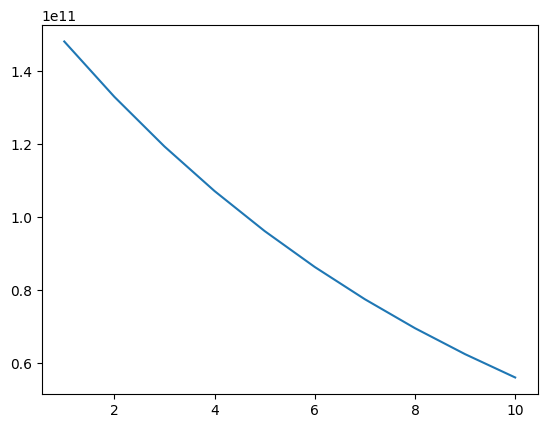

In [108]:
J_hist
x_axis = range(1, 11)
plt.plot(x_axis, J_hist)

In [120]:
compute_cost(train_df['area'], train_df['price'], w_optim, b_optim)

np.float64(164851783597.05322)

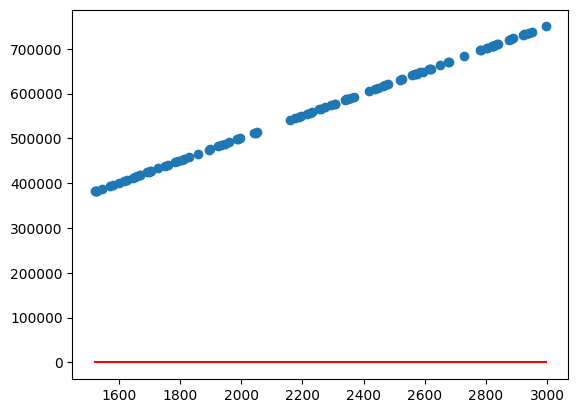

In [119]:
x1 = train_df['area'].min()
x2 = train_df['area'].max()
y1 = predict(x1, w_optim, b_optim)
y2 = predict(x2, w_optim, b_optim)

plt.scatter(train_df['area'], train_df['price'])
plt.plot([x1, x2], [y1, y2], color='red')